## 1. **Описание данных.**

# Признак:

**Hours Studied:** Общее количество часов, потраченное на подготовку.

# Целевая переменная (таргет)

**Score** Балл за экзамен. Варьируется от 0 до 100.

## 2. Импорт библиотек и презентация данных.

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("D:\\программирование\\student_scores.csv")
X = dataset['hours_studied'].values.reshape(-1, 1) 
Y = dataset['score']
dataset

,ID,hours_studied,score
0,student_id,6.066596,48.145196
1,2119,0.880000,4.150000
2,1347,0.890000,7.510000
3,1927,0.940000,5.400000
4,1161,1.000000,3.430000
...,...,...,...
2475,655,11.150000,87.740000
2476,1234,11.160000,91.320000
2477,1650,11.180000,91.660000
2478,1454,11.200000,92.700000


## 3. Линейная модель.

In [596]:
X0 = np.column_stack((np.ones(dataset.shape[0]), X))

X_T_X_inv = np.linalg.inv(X0.T.dot(X0))
matrix_b = X_T_X_inv.dot(X0.T.dot(Y))
predicted_Y = X0.dot(matrix_b)
print(f'Уравнение линейной регресии: {matrix_b[1]}*x {matrix_b[0]}')


Уравнение линейной регресии: 11.404074609727658*x -21.075571990406775


In [597]:
residuals = predicted_Y -  Y
RSS = np.sum(residuals**2)
TSS = np.sum((Y - Y.mean())**2)
R_2 = 1 - RSS/ TSS
print(f'R^2 score = {R_2}')

R^2 score = 0.9628349964174071


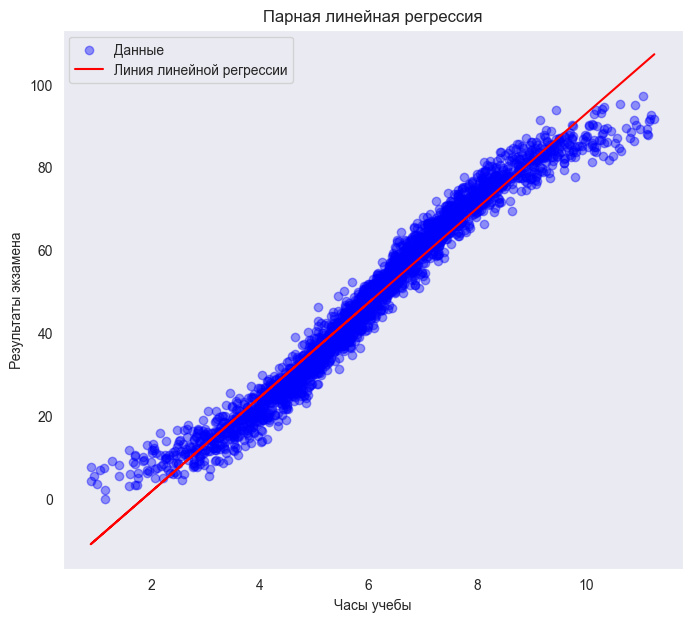

In [598]:
plt.figure(figsize=(8, 7))
plt.scatter(dataset['hours_studied'], dataset['score'], color='blue', label='Данные', alpha=0.4)
plt.plot(dataset['hours_studied'], predicted_Y, color='red', label='Линия линейной регрессии')
plt.title('Парная линейная регрессия')
plt.xlabel('Часы учебы')
plt.ylabel('Результаты экзамена')
plt.legend()
plt.grid()
plt.show()

## 4. Полиномиальная модель.


In [602]:
degree = 3 
X1 = np.column_stack([X**i for i in range(degree + 1)])  # Полином: [1, x, x^2, ..., x^degree]

X_T_X_inv1 = np.linalg.inv(X1.T.dot(X1))
matrix_b1 = X_T_X_inv1.dot(X1.T.dot(Y))
predicted_Y1 = X1.dot(matrix_b1)

print(f'Уравнение полиномиальное регрессии: {matrix_b1[-1]}*x^3 + {matrix_b1[-2]}*x^2 + {matrix_b1[1]}*x + {matrix_b1[0]}')
sorted_indices = np.argsort(dataset['hours_studied'].values)
X_sorted = dataset['hours_studied'].values[sorted_indices]
predicted_Y_sorted = predicted_Y1[sorted_indices]



Уравнение полиномиальное регрессии: -0.23276128815274433*x^3 + 4.209699309156349*x^2 + -11.697925256921735*x + 16.287880031304667


In [603]:
residuals1 = predicted_Y1 -  Y
RSS1 = np.sum(residuals1**2)
TSS1 = np.sum((Y - Y.mean())**2)
R_2_1 = 1 - RSS1/ TSS1
print(f'R^2 score = {R_2_1}')

R^2 score = 0.9806732795488099


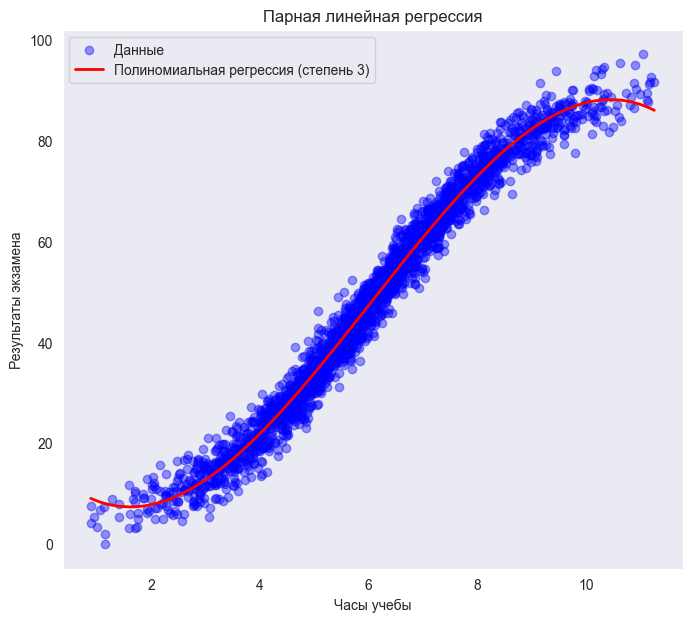

In [604]:
plt.figure(figsize=(8, 7))

plt.scatter(dataset['hours_studied'], dataset['score'], color='blue', label='Данные', alpha=0.4)

plt.plot(X_sorted, predicted_Y_sorted, color='red', label='Полиномиальная регрессия (степень 3)', linewidth=2)

plt.title('Парная линейная регрессия')
plt.xlabel('Часы учебы')
plt.ylabel('Результаты экзамена')
plt.legend()
plt.grid()
plt.show()

## 5. Степенная модель. 

In [605]:
dataset = dataset[dataset['hours_studied'] >0]
dataset = dataset[dataset['score'] >0]
Y_new = dataset['score']
X_new = dataset['hours_studied']
log_X = np.log(dataset['hours_studied'])
log_Y = np.log(dataset['score'])

log_X = np.column_stack((np.ones(log_X.shape[0]), log_X))
X_T_X_inv2 = np.linalg.inv(log_X.T.dot(log_X))
matrix_b2 = X_T_X_inv2.dot(log_X.T.dot(log_Y))
predicted_Y2 = log_X.dot(matrix_b2)
predicted_Y2 = np.exp(predicted_Y2)

a = np.exp(matrix_b2[0])
b = matrix_b2[1] 
print(f'Уравнение степенной модели: {a}*x^({b})')

Уравнение степенной модели: 2.492061796172283*x^(1.6137707903430356)


In [606]:
residuals2 = predicted_Y2 -  Y_new
RSS2 = np.sum(residuals2**2)
TSS2 = np.sum((Y_new - Y_new.mean())**2)
R_2_2 = 1 - RSS2/TSS2
print(f'R^2 score = {R_2_2}')

R^2 score = 0.9387909049012821


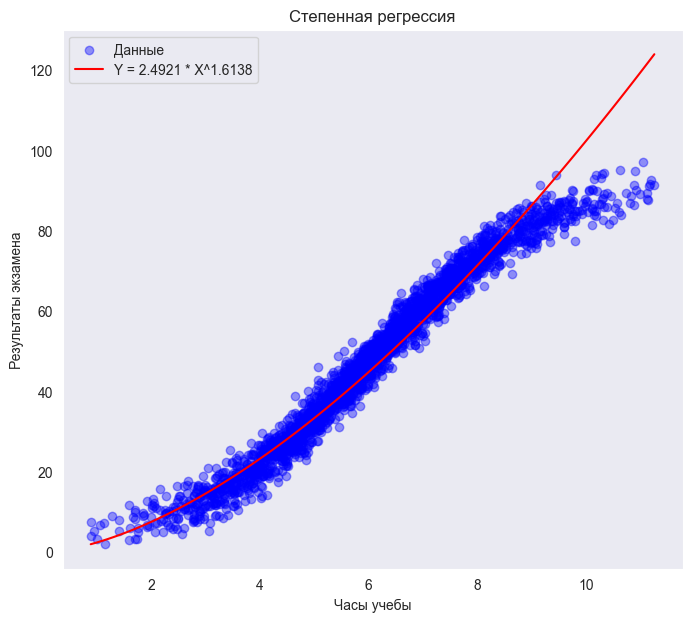

In [607]:
plt.figure(figsize=(8, 7))
plt.scatter(dataset['hours_studied'], dataset['score'], color='blue', label='Данные', alpha=0.4)

X_line = np.linspace(dataset['hours_studied'].min(), dataset['hours_studied'].max(), 100)
Y_line = a * (X_line ** b)
plt.plot(X_line, Y_line, color='red', label=f'Y = {a:.4f} * X^{b:.4f}')

plt.title('Степенная регрессия')
plt.xlabel('Часы учебы')
plt.ylabel('Результаты экзамена')
plt.legend()
plt.grid()
plt.show()

## 6. Экспоненциальная модель.

In [608]:
X3 = np.column_stack((np.ones(X_new.shape[0]), X_new))

X_T_X_inv3 = np.linalg.inv(X3.T.dot(X3))
matrix_b3 = X_T_X_inv3.dot(X3.T.dot(log_Y))
predicted_Y3 = X3.dot(matrix_b3)
predicted_Y3 = np.exp(predicted_Y3)

a = np.exp(matrix_b3[0]) 
b = matrix_b3[1]        
print(f'Уравнение экспоненциальной регрессии: {a}*e^({b})')

Уравнение экспоненциальной регрессии: 7.050404787206055*e^(0.2929755389038354)


In [609]:
residuals3 = predicted_Y3 -  Y_new
RSS3 = np.sum(residuals3**2)
TSS3= np.sum((Y_new - Y_new.mean())**2)
R_2_3 = 1 - RSS3/TSS3
print(f'R^2 score = {R_2_3}')

R^2 score = 0.6489241228255451


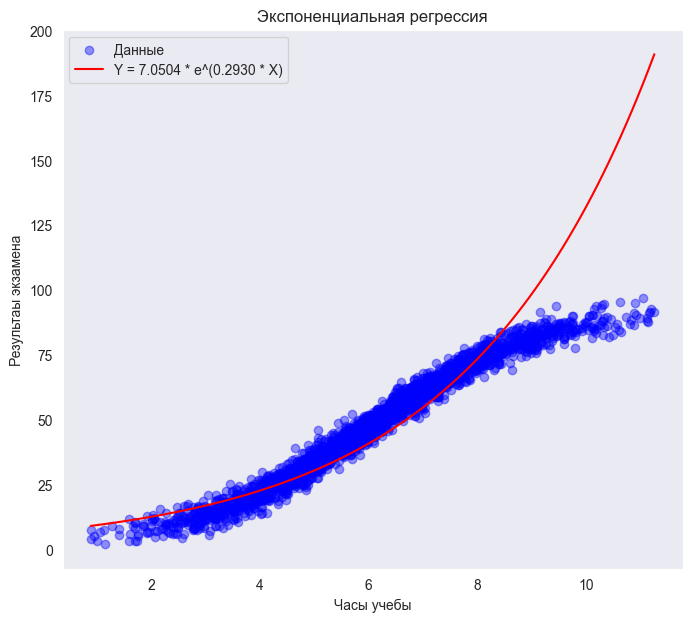

In [610]:
plt.figure(figsize=(8, 7))

plt.scatter(dataset['hours_studied'], dataset['score'], color='blue', label='Данные', alpha=0.4)

X_line = np.linspace(dataset['hours_studied'].min(), dataset['hours_studied'].max(), 100)
Y_line = a * np.exp(b * X_line) 
plt.plot(X_line, Y_line, color='red', label=f'Y = {a:.4f} * e^({b:.4f} * X)')

plt.title('Экспоненциальная регрессия')
plt.xlabel('Часы учебы')
plt.ylabel('Результаы экзамена')
plt.legend()
plt.grid()
plt.show()

## Выводы.

**Лучше всего** данные описывает **полиномиальная модель третьей степени**. Можно предположить, что усилия в подготовке к экзаменам не приносят значительного эффекта сразу, в самом начале изучение предметов всегда дается тяжелее. По мере продвижения в понимании предмета, изучающий начинает лучше ориентироваться в материале. Каждое последующее усилие приводит к более заметному приросту знаний и, соответственно, баллов на экзамене. В конце же вновь наблюдается замедление. При приближении к верхнему пределу возможных баллов (например, около 80 из 100) получить каждый дополнительный балл обычно становится сложнее. В этом диапазоне преобладает эффект убывающей отдачи: увеличение понимания предмета требует всё больше усилий, а достигнутые результаты постепенно приближаются к максимуму, который сложно превысить.

Данная модель подтверждает идею, что эффекты усвоения знаний и подготовки к экзамену неоднородны: сначала требуется время, чтобы преодолеть барьер начальной сложности, затем наблюдается быстрый рост эффективности, а по мере приближения к совершенству прирост замедляется. 

**Хуже всего** справилась **экспоненциальная модель**. Она предполагает, что зависимая переменная растет с постоянным экспоненциальным ростом, что исключает эффект насыщения - "потолка". В текущих датасете потолком является максимальное количество баллов за экзамен. Возможно, это модель смогла лучше описать данные, если бы целевой переменной был не балл за экзамен, а какое-то количественное описание того, насколько глубоко студент разбирается в предмете. 

**Степенная и линейная модели** справились довольно точно, но у обеих есть минусы. Степенная, как и экспоненциальная, неограниченно растет по мере увеличение независимой переменной. А линейная ни в самом начале, ни в самом конце не учитываем эффекты замедления (производная везде - константа, что делает линейную модель негибкой).